In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import keras
import h5py
import PIL
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize as tokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split

import nltk
nltk.download('punkt')

/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


[nltk_data] Downloading package punkt to
[nltk_data]     /home/nachofranco14/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
ds = pd.read_csv("../yelp.csv")
SEED = 40

# Predicting Yelp reviews stars
## Data exploration and analysis
### Data volumetry

In [3]:
ds.shape

(10000, 10)

In [4]:
ds.head()

business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0       1      0  
3  uZetl9T0NcROGOyFfughhg     1       2      0  
4  vYmM4KTsC8ZfQBg-j5MWkw     0       0      0

### Variable analysis

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [6]:
ds.describe(include='all')

# Las variables (business_id, review_id, text, type, user_id,) son de tipo string
# La var date es de tipo date
# Las vars stars, cool, useful y funny son de tipo float

business_id        date               review_id  \
count                    10000       10000                   10000   
unique                    4174        1995                   10000   
top     JokKtdXU7zXHcr20Lrk29A  2011-03-28  XDPXwd7STgbIPP4qAiEngw   
freq                        37          21                       1   
mean                       NaN         NaN                     NaN   
std                        NaN         NaN                     NaN   
min                        NaN         NaN                     NaN   
25%                        NaN         NaN                     NaN   
50%                        NaN         NaN                     NaN   
75%                        NaN         NaN                     NaN   
max                        NaN         NaN                     NaN   

               stars           text    type                 user_id  \
count   10000.000000          10000   10000                   10000   
unique           NaN           9998       1                    6403   
top              NaN  Great service  review  fczQCSmaWF78toLEmb0Zsw   
freq             NaN              2   10000                      38   
mean        3.777500            NaN     NaN                     NaN   
std         1.214636            NaN     NaN                     NaN   
min         1.000000            NaN     NaN                     NaN   
25%         3.000000            NaN     NaN                     NaN   
50%         4.000000            NaN     NaN                     NaN   
75%         5.000000            NaN     NaN                     NaN   
max         5.000000            NaN     NaN                     NaN   

                cool        useful         funny  
count   10000.000000  10000.000000  10000.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean        0.876800      1.409300      0.701300  
std         2.067861      2.336647      1.907942  
min         0.000000      0.000000      0.000000  
25%         0.000000      0.000000      0.000000  
50%         0.000000      1.000000      0.000000  
75%         1.000000      2.000000      1.000000  
max        77.000000     76.000000     57.000000

### NaN count by variable

In [7]:
for col in ds:
    print("Column: {}. NaN Count: {}".format(col, ds[col].isnull().sum()))
    
## No hay valores nulos en ninguna variable

Column: business_id. NaN Count: 0
Column: date. NaN Count: 0
Column: review_id. NaN Count: 0
Column: stars. NaN Count: 0
Column: text. NaN Count: 0
Column: type. NaN Count: 0
Column: user_id. NaN Count: 0
Column: cool. NaN Count: 0
Column: useful. NaN Count: 0
Column: funny. NaN Count: 0


### Output variable distribution

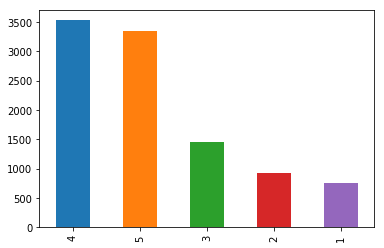

In [8]:
ds_stars = ds['stars']
ds_stars.value_counts().plot.bar()
del ds_stars

#################### train labels ####################


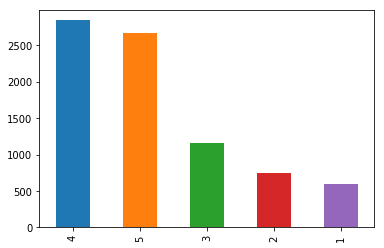

#################### test labels ####################


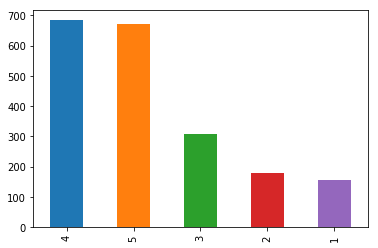

In [9]:
train, test = train_test_split(ds, test_size=0.2, shuffle=True)

sets = (
    ('train', train),
    ('test', test)
)

for set_name, set_data in sets:
    print('#' * 20, set_name, 'labels', '#' * 20)
    set_data.stars.value_counts().plot.bar()
    plt.show()

    


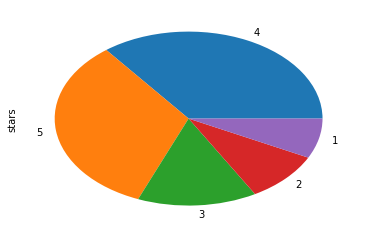

In [10]:
train.stars.value_counts().plot.pie()


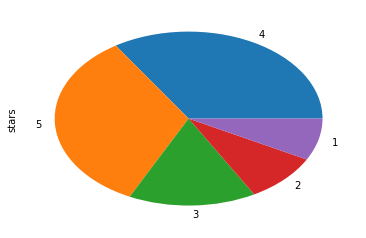

In [11]:
test.stars.value_counts().plot.pie()

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train.text)
X_train_counts.shape

(8000, 26407)

## Preprocessing
### Cleaning inputs

In [13]:
comments = pd.DataFrame({'content': train.text, 'stars': train.stars})
comments_test = pd.DataFrame({'content': test.text, 'stars': test.stars})

def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    return df

comments = standardize_text(comments, "content")
comments_test = standardize_text(comments_test, "content")

comments.to_csv("clean_data.csv")
comments.head()

df_train = comments.copy()
df_test = comments_test.copy()



content  stars
4107  wow  what a difference  i came here last year ...      4
1020  when i called to place an order last night i w...      4
4317  we were at the at t store next door and had ti...      4
4461  lame name   not so lame sandwiches   \n\ni lik...      4
8936  i hadnt been there in years, and it was all i ...      4

### Tokenization

In [14]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

comments["tokens"] = comments["content"].apply(tokenizer.tokenize)
comments.head()

content  stars  \
4107  wow  what a difference  i came here last year ...      4   
1020  when i called to place an order last night i w...      4   
4317  we were at the at t store next door and had ti...      4   
4461  lame name   not so lame sandwiches   \n\ni lik...      4   
8936  i hadnt been there in years, and it was all i ...      4   

                                                 tokens  
4107  [wow, what, a, difference, i, came, here, last...  
1020  [when, i, called, to, place, an, order, last, ...  
4317  [we, were, at, the, at, t, store, next, door, ...  
4461  [lame, name, not, so, lame, sandwiches, i, lik...  
8936  [i, hadnt, been, there, in, years, and, it, wa...

#### Stemming and deleting stop words

In [15]:
import nltk
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier

stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nachofranco14/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def cv(df_train, df_test):
    count_vectorizer = CountVectorizer(stop_words='english')

    train = count_vectorizer.fit_transform(df_train.content)
    
    test = count_vectorizer.transform(df_test.content)
    return train, test, count_vectorizer

x_train_cv, x_test_cv, count_vectorizer = cv(df_train, df_test)
x_train_cv.shape
x_test_cv.shape

pd.Series(count_vectorizer.get_feature_names()).sample(5)

(8000, 25959)

(2000, 25959)

16833     pennies
9089          flo
12579    junction
13024       lamps
8250      evolves
dtype: object

#### TFIDF

In [17]:
def tfidf(df_train, df_test):
    tfidf_transformer = TfidfTransformer()

    train = tfidf_transformer.fit_transform(df_train)

    test = tfidf_transformer.transform(df_test)
    
    return train, test, tfidf_transformer

X_train_tfidf, X_test_tfidf, tfidf_transformer = tfidf(x_train_cv, x_test_cv)
X_train_tfidf.shape
X_test_tfidf.shape

(8000, 25959)

(2000, 25959)

# Training

In [18]:
models_metrics = []
def get_accuracy(pred, values, text='', is_train=True, model_name='unnamed'):
    accuracy, precision, recall, f1 = get_metrics(values, pred)
    text = "model = %s, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (model_name, accuracy, precision, recall, f1)
    if is_train: 
        print(10*'='+' TRAIN '+10*'=')
    else:
        print(10*'='+' TEST '+10*'=')  
        models_metrics.append(text)
    print(text)
    
    print()

In [19]:
import  numpy as  np
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.winter):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=20)
    plt.yticks(tick_marks, classes, fontsize=20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", 
                 color="white" if cm[i, j] < thresh else "black", fontsize=40)
    
    plt.tight_layout()
    plt.ylabel('True label', fontsize=30)
    plt.xlabel('Predicted label', fontsize=30)

    return plt

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

def get_metrics(y_test, y_predicted):  
    # true positives / (true positives+false positives)
    precision = precision_score(y_test, y_predicted, pos_label=None,
                                    average='weighted')             
    # true positives / (true positives + false negatives)
    recall = recall_score(y_test, y_predicted, pos_label=None,
                              average='weighted')
    
    # harmonic mean of precision and recall
    f1 = f1_score(y_test, y_predicted, pos_label=None, average='weighted')
    
    # true positives + true negatives/ total
    accuracy = accuracy_score(y_test, y_predicted)
    
    cm = confusion_matrix(y_test, y_predicted)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['1 star','2 stars','3 stars','4 stars','5 stars'], normalize=False, title='Confusion matrix')
    plt.show()
    print(cm)
    
    return accuracy, precision, recall, f1

def evaluate_model(model, X_train, y_train, X_test, y_test, fit=False, model_name='unnamed'):
    if fit:
        model.fit(X_train, y_train)
    
    y_train_predicted = model.predict(X_train)
    y_test_predicted = model.predict(X_test)
    
    accuracy, precision, recall, f1 = get_metrics(y_train, y_train_predicted)
    print("="*10 + " TRAIN " + "="*10)
    print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (accuracy, precision, recall, f1))
    
    accuracy, precision, recall, f1 = get_metrics(y_test, y_test_predicted)
    text = "model = %s, accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f \n" % (model_name, accuracy, precision, recall, f1)
    models_metrics.append(text)
    print("="*10 + " TEST " + "="*10)
    print(text)
    
    return y_train_predicted, y_test_predicted

#### Logistic Regression

#### Logistic Regression with count vectorizer

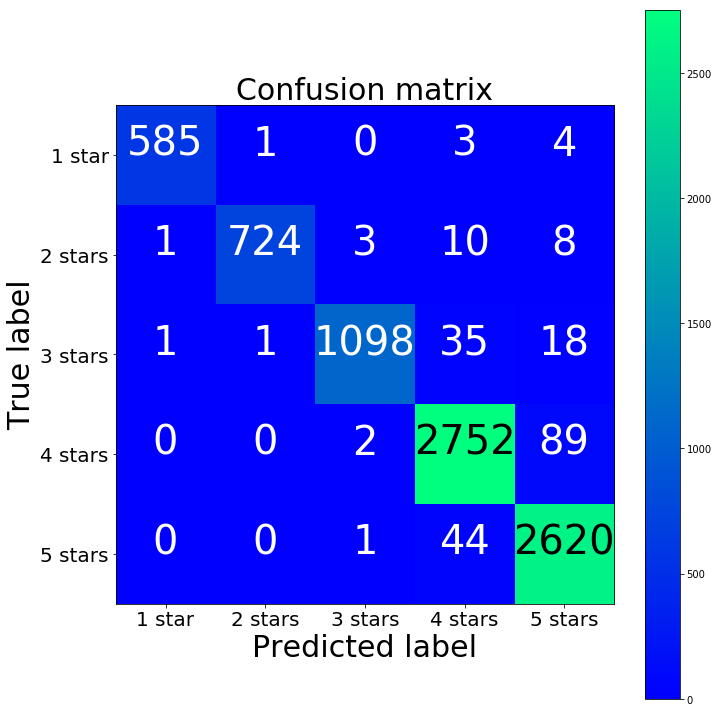

[[ 585    1    0    3    4]
 [   1  724    3   10    8]
 [   1    1 1098   35   18]
 [   0    0    2 2752   89]
 [   0    0    1   44 2620]]
========== TRAIN ==========
accuracy = 0.972, precision = 0.973, recall = 0.972, f1 = 0.972 



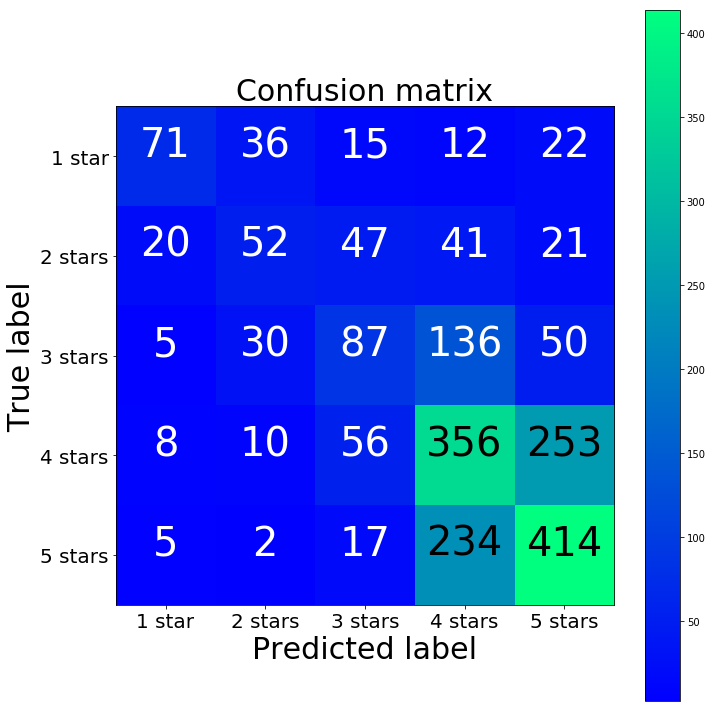

(array([4, 4, 4, ..., 3, 4, 4]), array([4, 5, 5, ..., 4, 4, 2]))

[[ 71  36  15  12  22]
 [ 20  52  47  41  21]
 [  5  30  87 136  50]
 [  8  10  56 356 253]
 [  5   2  17 234 414]]
========== TEST ==========
model = LogisticRegression Count Vectorizer, accuracy = 0.490, precision = 0.486, recall = 0.490, f1 = 0.483 



In [21]:
evaluate_model(model=LogisticRegression(),X_train=x_train_cv, y_train=train.stars, X_test=x_test_cv, y_test=test.stars, fit=True, model_name='LogisticRegression Count Vectorizer')

#### Logistic Regression with TFIDF

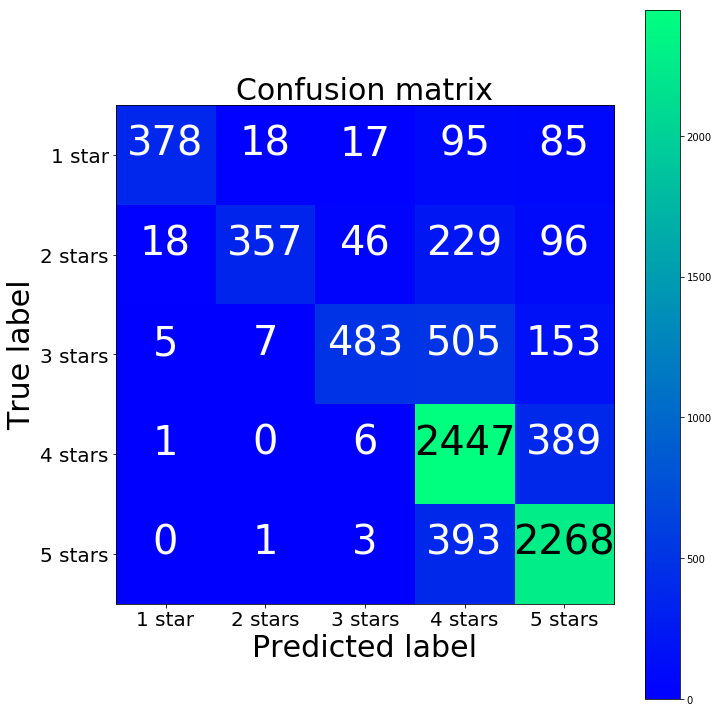

[[ 378   18   17   95   85]
 [  18  357   46  229   96]
 [   5    7  483  505  153]
 [   1    0    6 2447  389]
 [   0    1    3  393 2268]]
========== TRAIN ==========
accuracy = 0.742, precision = 0.772, recall = 0.742, f1 = 0.731 



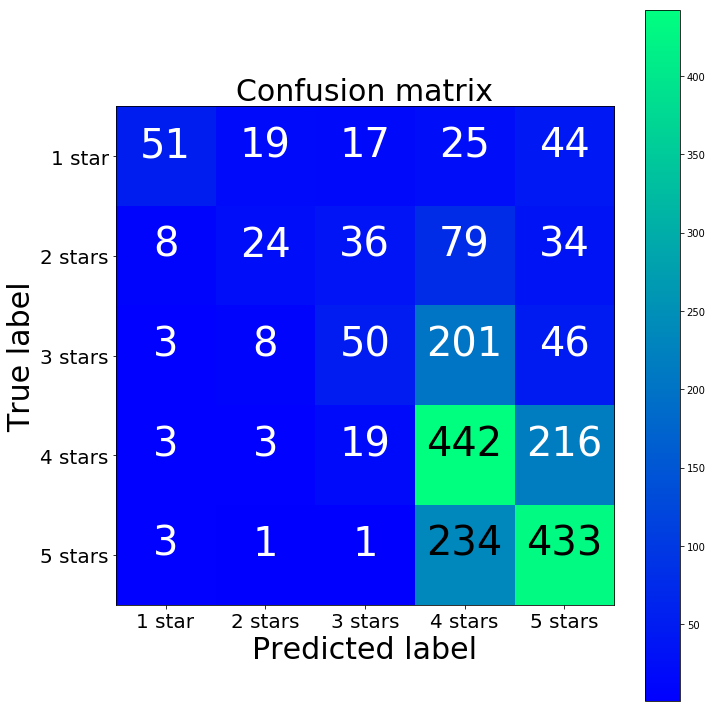

[[ 51  19  17  25  44]
 [  8  24  36  79  34]
 [  3   8  50 201  46]
 [  3   3  19 442 216]
 [  3   1   1 234 433]]
========== TEST ==========
model = LogisticRegression TFIDF, accuracy = 0.500, precision = 0.503, recall = 0.500, f1 = 0.472 



(array([4, 4, 5, ..., 5, 5, 4]), array([4, 5, 5, ..., 4, 4, 4]))

In [22]:
evaluate_model(model=LogisticRegression(),X_train=X_train_tfidf, y_train=train.stars, X_test=X_test_tfidf, y_test=test.stars, fit=True, model_name='LogisticRegression TFIDF')

### Naive Bayes

#### Naive Bayes with count vectorizer

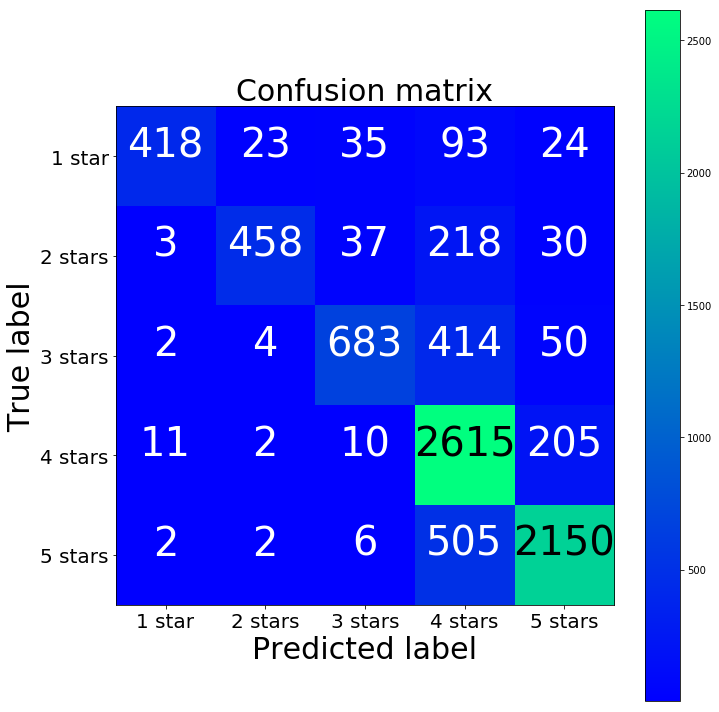

[[ 418   23   35   93   24]
 [   3  458   37  218   30]
 [   2    4  683  414   50]
 [  11    2   10 2615  205]
 [   2    2    6  505 2150]]
========== TRAIN ==========
accuracy = 0.790, precision = 0.819, recall = 0.790, f1 = 0.789 



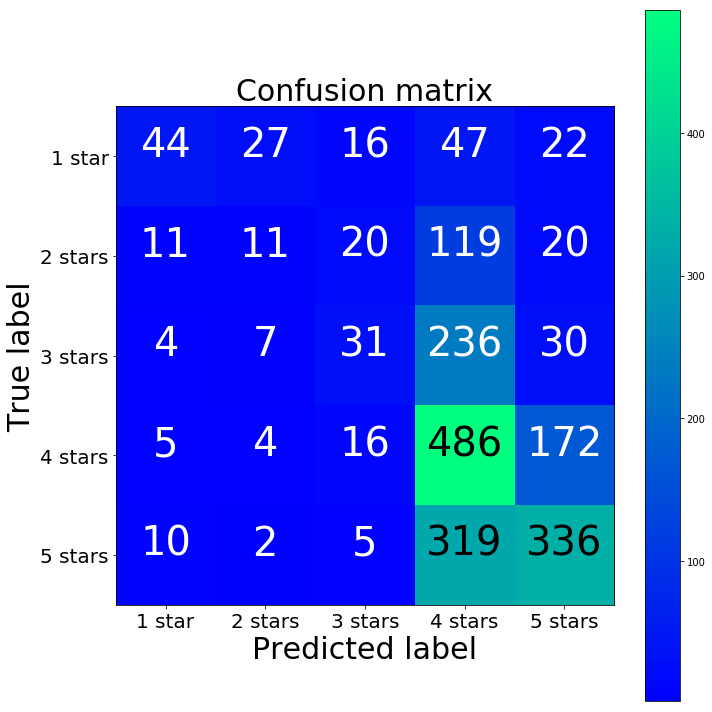

[[ 44  27  16  47  22]
 [ 11  11  20 119  20]
 [  4   7  31 236  30]
 [  5   4  16 486 172]
 [ 10   2   5 319 336]]
========== TEST ==========
model = Naive Bayes Count Vectorizer, accuracy = 0.454, precision = 0.452, recall = 0.454, f1 = 0.419 



(array([4, 4, 5, ..., 3, 4, 4]), array([4, 5, 5, ..., 4, 4, 4]))

In [23]:
evaluate_model(model=MultinomialNB(),X_train=x_train_cv, y_train=train.stars, X_test=x_test_cv, y_test=test.stars, fit=True, model_name='Naive Bayes Count Vectorizer')

#### Naive Bayes with TFIDF

/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


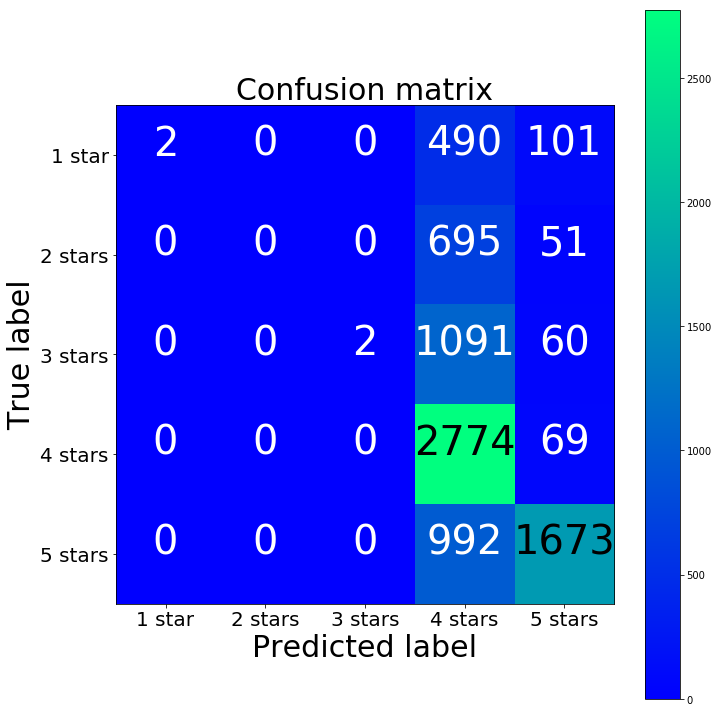

[[   2    0    0  490  101]
 [   0    0    0  695   51]
 [   0    0    2 1091   60]
 [   0    0    0 2774   69]
 [   0    0    0  992 1673]]
========== TRAIN ==========
accuracy = 0.556, precision = 0.667, recall = 0.556, f1 = 0.464 



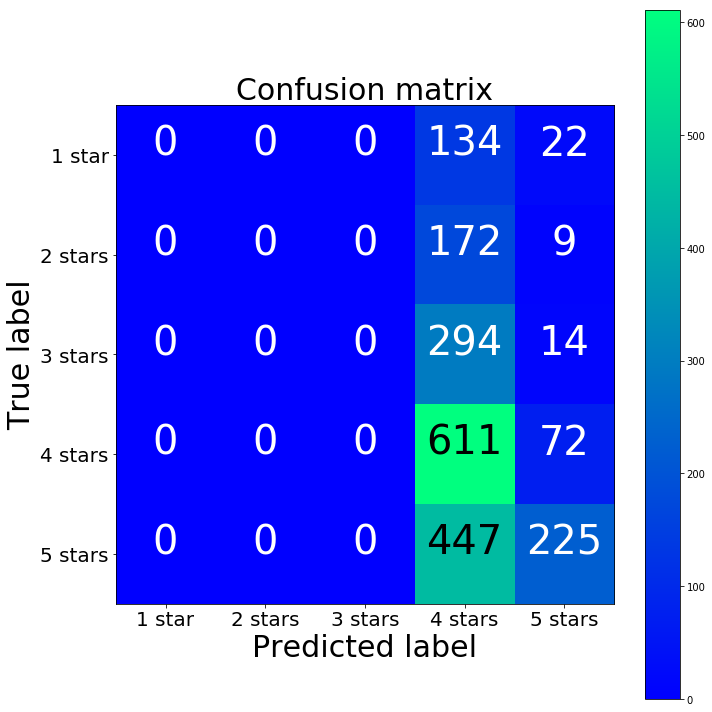

[[  0   0   0 134  22]
 [  0   0   0 172   9]
 [  0   0   0 294  14]
 [  0   0   0 611  72]
 [  0   0   0 447 225]]
========== TEST ==========
model = Naive Bayes TFIDF, accuracy = 0.418, precision = 0.347, recall = 0.418, f1 = 0.327 



(array([4, 4, 4, ..., 4, 4, 4]), array([4, 5, 4, ..., 4, 4, 4]))

In [24]:
evaluate_model(model=MultinomialNB(),X_train=X_train_tfidf, y_train=train.stars, X_test=X_test_tfidf, y_test=test.stars, fit=True, model_name='Naive Bayes TFIDF')

### SVM

#### SVM with count vectorizer

/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


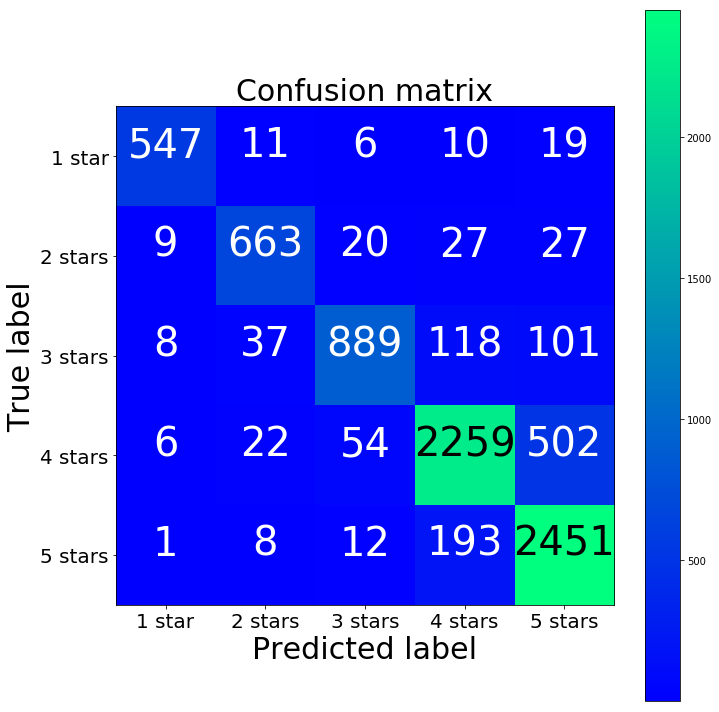

[[ 547   11    6   10   19]
 [   9  663   20   27   27]
 [   8   37  889  118  101]
 [   6   22   54 2259  502]
 [   1    8   12  193 2451]]
========== TRAIN ==========
accuracy = 0.851, precision = 0.856, recall = 0.851, f1 = 0.851 



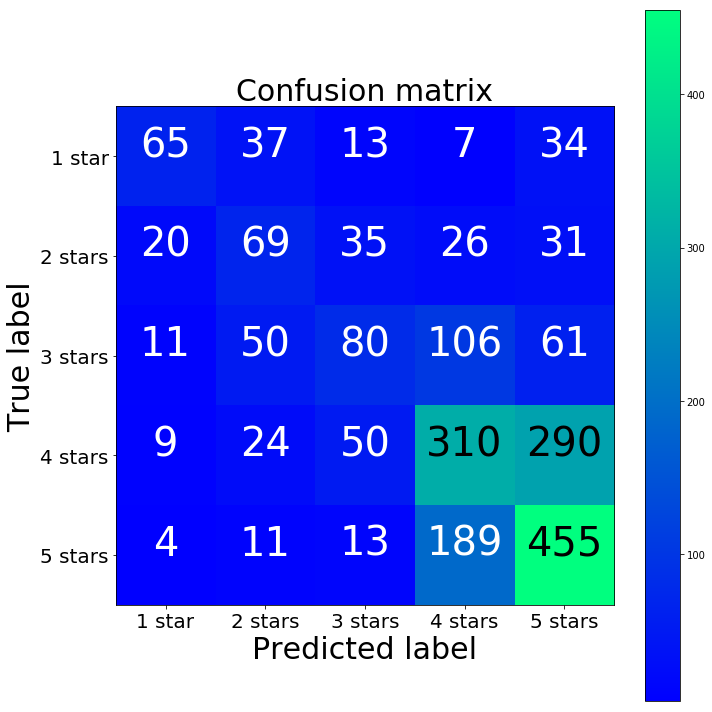

[[ 65  37  13   7  34]
 [ 20  69  35  26  31]
 [ 11  50  80 106  61]
 [  9  24  50 310 290]
 [  4  11  13 189 455]]
========== TEST ==========
model = SVM Count Vectorizer, accuracy = 0.489, precision = 0.485, recall = 0.489, f1 = 0.480 



(array([4, 4, 5, ..., 3, 5, 4]), array([4, 5, 5, ..., 3, 5, 2]))

In [25]:
svm = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)
evaluate_model(model=svm,X_train=x_train_cv, y_train=train.stars, X_test=x_test_cv, y_test=test.stars, fit=True, model_name='SVM Count Vectorizer')

#### SVM with tfidf

/home/nachofranco14/Documents/facultad/machine_learning/ds/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


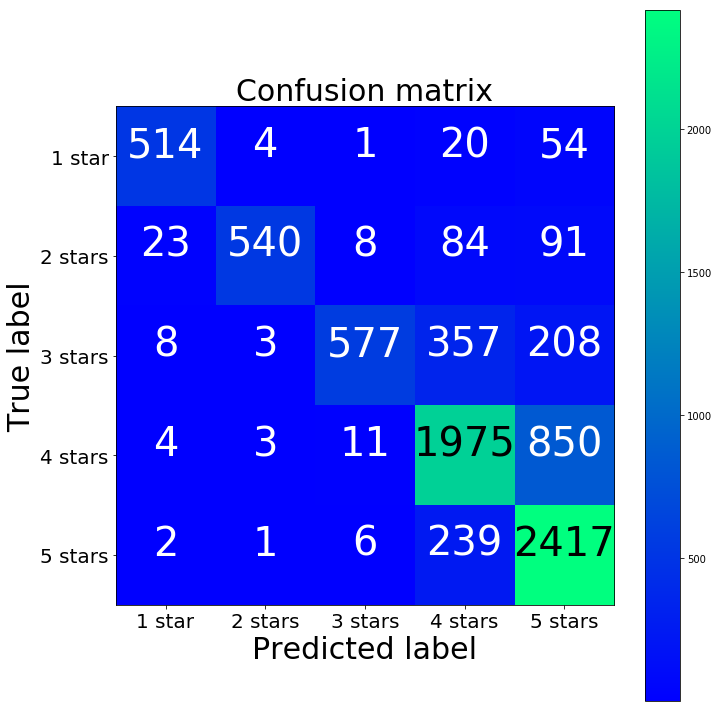

[[ 514    4    1   20   54]
 [  23  540    8   84   91]
 [   8    3  577  357  208]
 [   4    3   11 1975  850]
 [   2    1    6  239 2417]]
========== TRAIN ==========
accuracy = 0.753, precision = 0.783, recall = 0.753, f1 = 0.750 



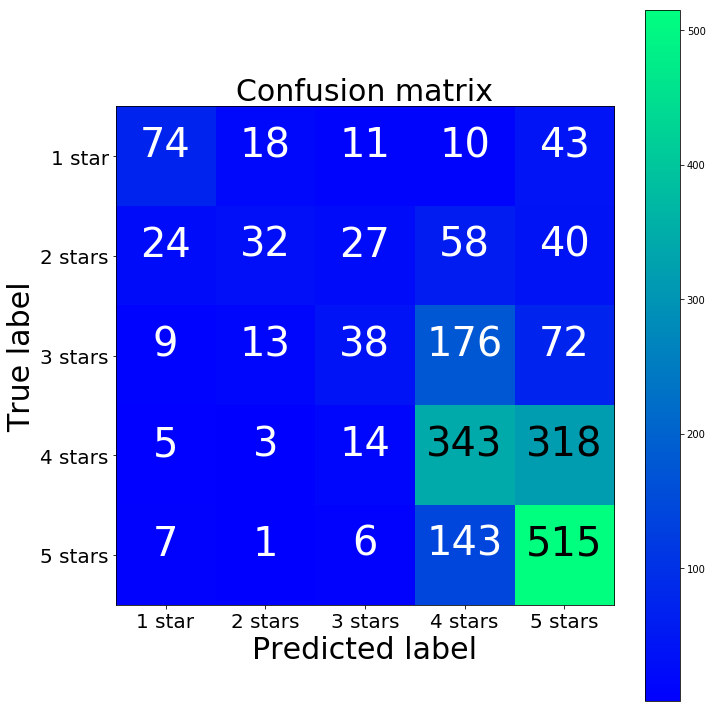

[[ 74  18  11  10  43]
 [ 24  32  27  58  40]
 [  9  13  38 176  72]
 [  5   3  14 343 318]
 [  7   1   6 143 515]]
========== TEST ==========
model = SVM TFIDF, accuracy = 0.501, precision = 0.488, recall = 0.501, f1 = 0.469 



(array([5, 4, 5, ..., 5, 5, 5]), array([5, 5, 5, ..., 4, 5, 4]))

In [26]:
evaluate_model(model=svm,X_train=X_train_tfidf, y_train=train.stars, X_test=X_test_tfidf, y_test=test.stars, fit=True, model_name='SVM TFIDF')

### Introducing some pipelines

StemmedCountVectorizer(analyzer='word', binary=False, decode_error='strict',
            dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
            lowercase=True, max_df=1.0, max_features=None, min_df=1,
            ngram_range=(1, 1), preprocessor=None, stop_words='english',
            strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
            tokenizer=None, vocabulary=None)

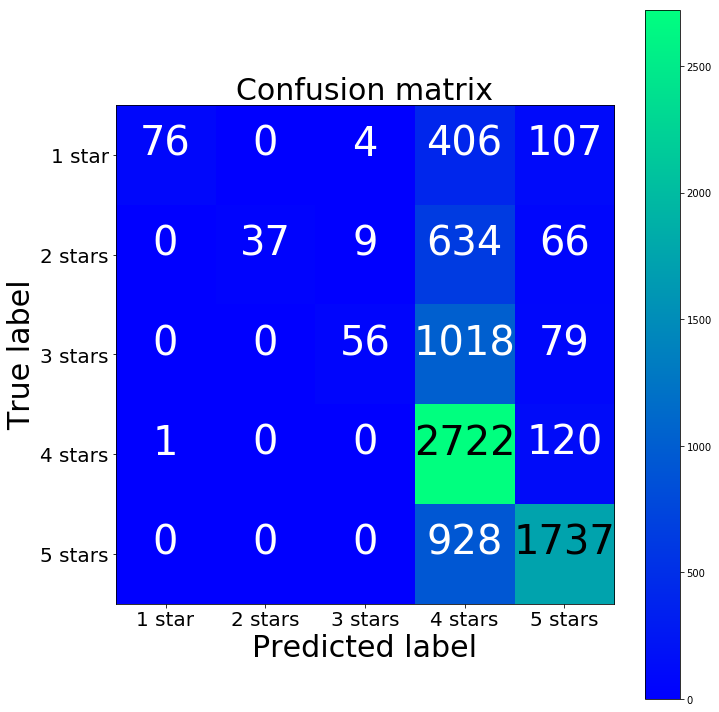

[[  76    0    4  406  107]
 [   0   37    9  634   66]
 [   0    0   56 1018   79]
 [   1    0    0 2722  120]
 [   0    0    0  928 1737]]
========== TRAIN ==========
model = unnamed, accuracy = 0.579, precision = 0.727, recall = 0.579, f1 = 0.508 




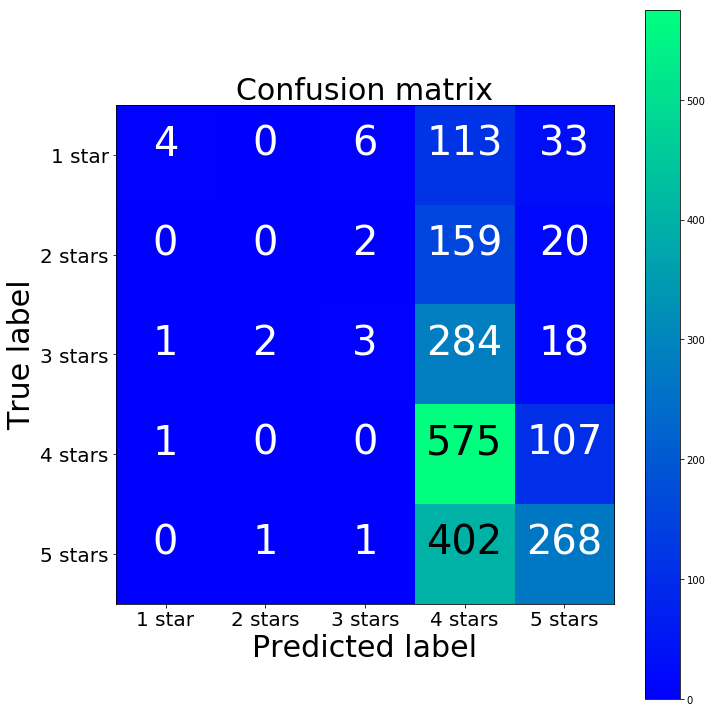

[[  4   0   6 113  33]
 [  0   0   2 159  20]
 [  1   2   3 284  18]
 [  1   0   0 575 107]
 [  0   1   1 402 268]]
========== TEST ==========
model = Pipeline 1, accuracy = 0.425, precision = 0.420, recall = 0.425, f1 = 0.345 




In [27]:
stemmed_count_vect = StemmedCountVectorizer(stop_words='english')
stemmed_count_vect.fit(df_train.content, df_train.stars)

text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect), \
                             ('tfidf', TfidfTransformer()), \
                             ('mnb', MultinomialNB(fit_prior=False)),
                            ])

text_mnb_stemmed = text_mnb_stemmed.fit(df_train.content, df_train.stars)

predicted_mnb_stemmed = text_mnb_stemmed.predict(df_train.content)
predicted_mnb_stemmed_test = text_mnb_stemmed.predict(df_test.content)

get_accuracy(predicted_mnb_stemmed, df_train.stars)
get_accuracy(predicted_mnb_stemmed_test, df_test.stars, is_train=False, model_name='Pipeline 1')

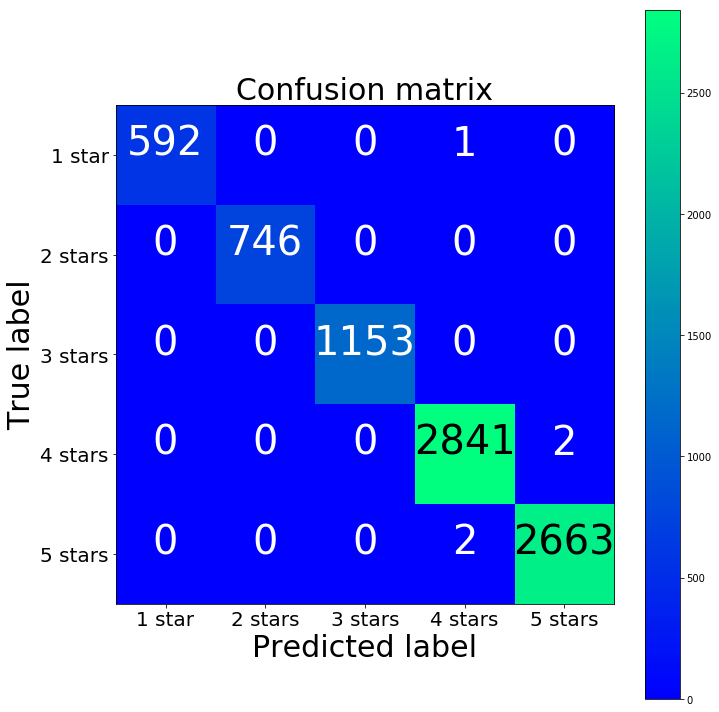

[[ 592    0    0    1    0]
 [   0  746    0    0    0]
 [   0    0 1153    0    0]
 [   0    0    0 2841    2]
 [   0    0    0    2 2663]]
========== TRAIN ==========
model = unnamed, accuracy = 0.999, precision = 0.999, recall = 0.999, f1 = 0.999 




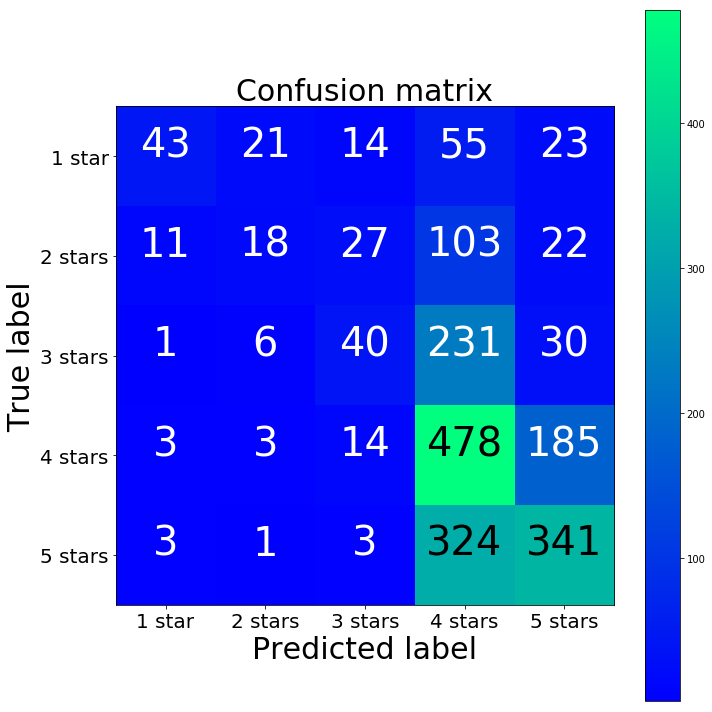

[[ 43  21  14  55  23]
 [ 11  18  27 103  22]
 [  1   6  40 231  30]
 [  3   3  14 478 185]
 [  3   1   3 324 341]]
========== TEST ==========
model = Pipeline 2, accuracy = 0.460, precision = 0.479, recall = 0.460, f1 = 0.430 




In [28]:
text_clf = Pipeline([('vect', CountVectorizer()), \
                     ('tfidf', TfidfTransformer()), \
                     #('log', LogisticRegression()), \
                     ('clf', MultinomialNB()), 
                    ])

text_clf = text_clf.fit(df_train.content, df_train.stars)

parameters = {'vect__ngram_range': [(1, 1), (1, 2)], \
                  'tfidf__use_idf': (True, False), \
                  'clf__alpha': (1e-2, 1e-3),
             }

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(df_train.content, df_train.stars)
pred_gs_clf = gs_clf.predict(df_train.content)
pred_gs_clf_test = gs_clf.predict(df_test.content)

get_accuracy(pred_gs_clf, df_train.stars)
get_accuracy(pred_gs_clf_test, df_test.stars, is_train=False, model_name='Pipeline 2')

In [29]:
for metric in models_metrics:
    print(metric)

model = LogisticRegression Count Vectorizer, accuracy = 0.490, precision = 0.486, recall = 0.490, f1 = 0.483 

model = LogisticRegression TFIDF, accuracy = 0.500, precision = 0.503, recall = 0.500, f1 = 0.472 

model = Naive Bayes Count Vectorizer, accuracy = 0.454, precision = 0.452, recall = 0.454, f1 = 0.419 

model = Naive Bayes TFIDF, accuracy = 0.418, precision = 0.347, recall = 0.418, f1 = 0.327 

model = SVM Count Vectorizer, accuracy = 0.489, precision = 0.485, recall = 0.489, f1 = 0.480 

model = SVM TFIDF, accuracy = 0.501, precision = 0.488, recall = 0.501, f1 = 0.469 

model = Pipeline 1, accuracy = 0.425, precision = 0.420, recall = 0.425, f1 = 0.345 

model = Pipeline 2, accuracy = 0.460, precision = 0.479, recall = 0.460, f1 = 0.430 

